In [17]:
%load_ext autoreload
%autoreload 2

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
pd.set_option('display.precision', 18)
np.set_printoptions(precision=18)

In [3]:
def upload_df(file_path, start_basis_size = 900):
  df = pd.read_csv(file_path)
  df['Basis Size'] = df['Basis Size'].astype(int)

  for i in range(df['Basis Size'].values[0],start_basis_size + 1,100):
    df.drop(df[df['Basis Size'] == i].index, inplace = True)

  return df

In [4]:
def upload_df1(file_path):
  df = pd.read_csv(file_path)
  df['basis size'] = df['basis size'].astype(int)

  return df[2:]

In [5]:

def graph(df: pd.DataFrame, n_cols: int = 4):
    """
    Generates and displays a grid of plots for each feature in a DataFrame
    against the 'basis size' column.

    Args:
        df (pd.DataFrame): The input DataFrame. It must contain a column
                           named 'basis size' (case-insensitive).
        n_cols (int): The number of columns to use in the plot grid.
                      Defaults to 4.
    """
    # Create a copy to avoid changing the original DataFrame
    df_plot = df.copy()

    # Standardize column names to lowercase for consistency
    df_plot.columns = [col.lower() for col in df_plot.columns]

    # Check for the required 'basis size' column
    if 'basis size' not in df_plot.columns:
        raise ValueError("Input DataFrame must contain a 'basis size' column.")

    # Prepare the data and identify features to plot
    df_plot['basis size'] = df_plot['basis size'].astype(int)
    features = sorted([col for col in df_plot.columns if col != 'basis size'])
    n_features = len(features)

    # Handle the case of no features to plot
    if n_features == 0:
        print("No feature columns found to plot.")
        return

    # Calculate the required number of rows for the grid
    n_rows = (n_features + n_cols - 1) // n_cols

    # Create the figure and subplots
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(4 * n_cols, 3.5 * n_rows), sharex=True)
    fig.suptitle('Features vs. Basis Size', fontsize=16, y=1.03)

    # Flatten the axes array for easy, single-loop iteration
    axes = axes.flatten()

    # Plot each feature against the basis size
    for i, feature in enumerate(features):
        ax = axes[i]
        ax.scatter(df_plot['basis size'], df_plot[feature], marker='o')

        # Format titles and labels for readability
        ax.set_title(feature.replace('_', ' ').title())
        ax.set_xlabel('Basis Size')
        ax.set_ylabel('Value')
        ax.grid(True, linestyle='--', alpha=0.6)

    # Clean up by removing any empty, unused subplots
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    # Adjust layout to prevent plot elements from overlapping
    plt.tight_layout(rect=[0, 0, 1, 0.98])
    plt.show()

In [6]:
li_2se = upload_df('/home/aldiyar/extrapolation/large-dataset/Li_2Se.csv')
li_2se = li_2se.drop(columns = ['SO1', 'SO2'])
li_2se = li_2se.rename(columns= {'Basis Size': 'basis size'})


In [7]:
li_2se_inf = li_2se.loc[li_2se['basis size'] == max(li_2se['basis size'])]
li_2se_init = li_2se.iloc[:-1]

In [8]:

be_1se = upload_df('/home/aldiyar/extrapolation/large-dataset/Be_1Se.csv')
be_1se = be_1se.drop(columns = ['SO1', 'SO2'])
be_1se = be_1se.rename(columns= {'Basis Size': 'basis size'})
be_1se_inf = be_1se.loc[be_1se['basis size'] == max(be_1se['basis size'])]
be_1se_init = be_1se.iloc[:-1]

In [9]:


be_3po = upload_df('/home/aldiyar/extrapolation/large-dataset/Be_3Po.csv')
be_3po = be_3po.drop(columns = ['SO1', 'SO2'])
be_3po = be_3po.rename(columns= {'Basis Size': 'basis size'})
be_3po_inf = be_3po.loc[be_3po['basis size'] == max(be_3po['basis size'])]
be_3po_init = be_3po.iloc[:-1]

In [10]:
be_1po = upload_df('/home/aldiyar/extrapolation/large-dataset/Be_1Po.csv')
be_1po = be_1po.drop(columns = ['SO1', 'SO2'])
be_1po = be_1po.rename(columns= {'Basis Size': 'basis size'})
be_1po_inf = be_1po.loc[be_1po['basis size'] == max(be_1po['basis size'])]
be_1po_init = be_1po.iloc[:-1]

In [11]:
li_2po = upload_df('/home/aldiyar/extrapolation/large-dataset/Li_2Po.csv')
li_2po = li_2po.drop(columns = ['SO1', 'SO2'])
li_2po = li_2po.rename(columns= {'Basis Size': 'basis size'})
li_2po_inf = li_2po.loc[li_2po['basis size'] == max(li_2po['basis size'])]
li_2po_init = li_2po.iloc[:-1]

In [12]:
be_3se = upload_df('/home/aldiyar/extrapolation/large-dataset/Be_3Se.csv')
be_3se = be_3se.drop(columns = ['SO1', 'SO2'])
be_3se = be_3se.rename(columns= {'Basis Size': 'basis size'})
be_3se_inf = be_3se.loc[be_3se['basis size'] == max(be_3se['basis size'])]
be_3se_init = be_3se.iloc[:-1]

In [13]:
b_4pe = upload_df1('/home/aldiyar/extrapolation/small-dataset/B_4Pe-01 dataframe.csv')

In [71]:
li_2po_inf

,basis size,Energy,MV,drach_MV,OO,1/r^2_1,1/r^2_12,1/r_1,1/r_12,r_1,r_12,r^2_1,r^2_12,delta(r_1),delta(r_12),drach_delta(r_1),drach_delta(r_12),prval(r_1),prval(r_12)
60,17500,-7.410156532650369776,-77.505469237351704237,-77.505621444598503444,-0.396425741653151975,9.966999628675120348,1.421872071376089952,1.879635316671870005,0.698801594915725022,1.957121250065350093,3.470696240730239968,9.31607855742599078,18.683158005233899246,4.558721758606099961,0.177425670744661007,4.558732350162229885,0.177424699939501995,-101.503817286192003166,0.096404985468817705


Available columns to analyze:
- Energy
- MV
- drach_MV
- OO
- 1/r^2_1
- 1/r^2_12
- 1/r_1
- 1/r_12
- r_1
- r_12
- r^2_1
- r^2_12
- delta(r_1)
- delta(r_12)
- drach_delta(r_1)
- drach_delta(r_12)
- prval(r_1)
- prval(r_12)
------------------------------



--- Fitting Exponential Model ---
Removed 3 early inconsistent point(s) for 'OO'
Optimizing Exponential weights using known value: -0.39642574
  Best weight power: 1 with distance 7.03e-10

--- Fitting Exponential SQ Model ---
Removed 3 early inconsistent point(s) for 'OO'
Optimizing Exponential SQ weights using known value: -0.39642574
  Best weight power: 1 with distance 7.99e-10

--- Fitting Power Law Model ---
Removed 3 early inconsistent point(s) for 'OO'
Removed 3 early inconsistent point(s) for 'OO'

--- Starting Self-Consistent IRLS with Weight Optimization ---
Optimizing weights using known value: -0.39642574
Testing weight powers: [1]
  Weight power 1: Distance = 3.26e-09
Best weight power: 1 with distance 3.26e-09

--- Final Fitted Parameters (after Self-Consistent IRLS) ---
C: -0.39642574 +/- 0.00000000
A: 0.00000000 +/- 0.00000000
B: 3.50917945 +/- 0.40553568

--- Final Result for 'OO' ---
Extrapolated Limit (C): -0.39642574
Total Combined Uncertainty: ± 0.00000000
Known 

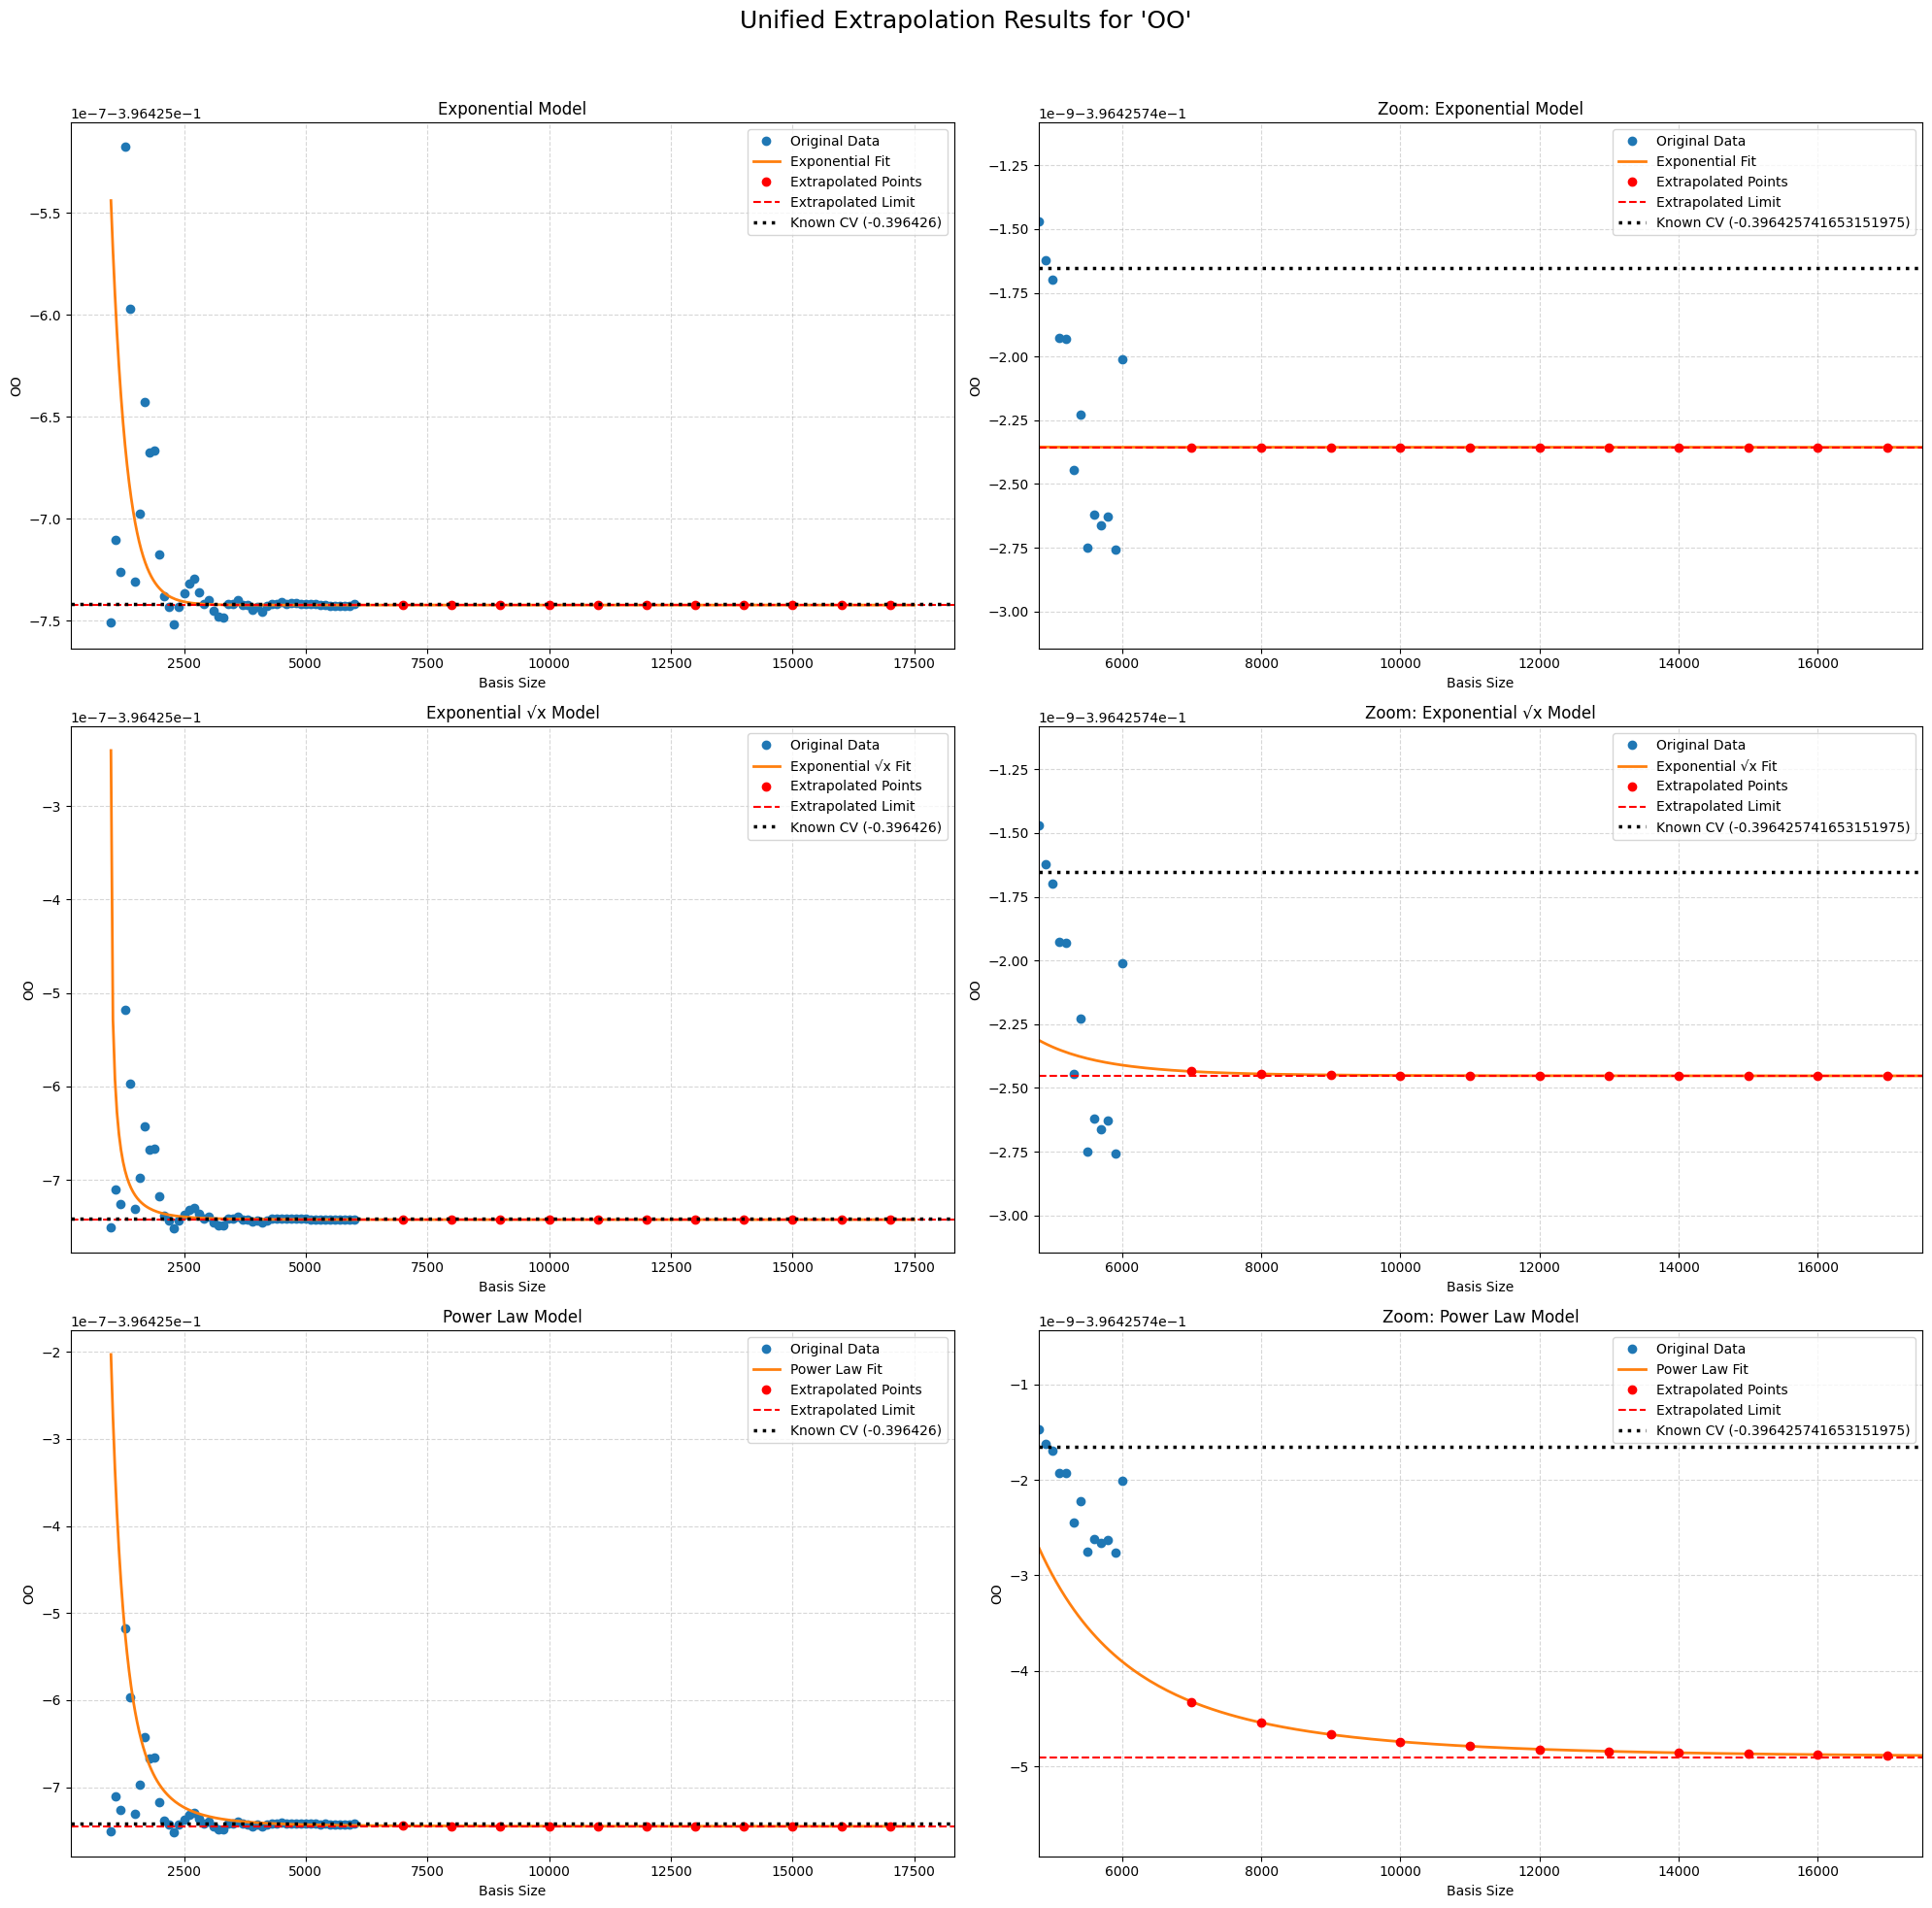

In [118]:
import extrapolator

extrapolator.unified_extrapolator(li_2po_init).fit()

In [108]:
reference_values = pd.read_csv('/home/aldiyar/extrapolation/large-dataset/reference_vals.txt', delim_whitespace=True)

/tmp/ipykernel_16207/4049882052.py:1: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  reference_values = pd.read_csv('/home/aldiyar/extrapolation/large-dataset/reference_vals.txt', delim_whitespace=True)


In [109]:
import re
import extrapolator  # your unified_extrapolator module

class SystemExtrapolator:
    """
    Given one system's dataframe with 'basis size' and multiple expectation value columns,
    extrapolate each column to infinity using unified_extrapolator and return new *_inf columns.
    """

    def __init__(self, df, target_basis_size):
        if "basis size" not in df.columns:
            raise ValueError("DataFrame must contain 'basis size'.")
        self.df = df.copy()
        self.target_basis_size = target_basis_size

    def extrapolate_all(self):
        result_df = self.df.copy()
        expectation_columns = [c for c in self.df.columns if c != "basis size"]

        for col in expectation_columns:
            extrap = extrapolator.unified_extrapolator(self.df)
            extrap.fit_column(col, self.target_basis_size)

            exp_inf = extrap.results['exponential'].params['C'].value
            exp_sq_inf = extrap.results['exponential_sq'].params['C'].value
            power_inf = extrap.results['power'].params['C'].value

            result_df[f"{col}_exp_inf"] = exp_inf
            result_df[f"{col}_exp_sq_inf"] = exp_sq_inf
            result_df[f"{col}_power_inf"] = power_inf

        return result_df


def extrapolate_system(df, system_name, target_basis_size):
    extr = SystemExtrapolator(df, target_basis_size)
    res = extr.extrapolate_all()

    rows = []
    for col in df.columns:
        if col == "basis size":
            continue
        rows.append({
            "system": system_name,
            "expectation_value": col,
            "exp_inf": res[f"{col}_exp_inf"].iloc[0],
            "exp_sq_inf": res[f"{col}_exp_sq_inf"].iloc[0],
            "power_inf": res[f"{col}_power_inf"].iloc[0],
        })
    return pd.DataFrame(rows)


def get_target_basis_size(reference_values, system_name):
    """
    Parse basis size from the 'source' column (e.g., our_calc_16400).
    If not found for this expectation, fall back to another row of the same system.
    """
    sys_refs = reference_values[reference_values["system"] == system_name]

    # Try to extract basis size from any matching source
    for src in sys_refs["source"].dropna().unique():
        match = re.search(r"our_calc_(\d+)", src)
        if match:
            return int(match.group(1))

    raise ValueError(f"Could not determine target basis size for {system_name}")


# --- Example usage ---

# assume you already have reference_values loaded (your big dataframe)
# and the 6 *_init dataframes

systems = {
    "infBe_1Po-01": be_1po_init,
    "infBe_1Se-01": be_1se_init,
    "infBe_3Po-01": be_3po_init,
    "infBe_3Se-01": be_3se_init,
    "infLi_2Po-01": li_2po_init,
    "infLi_2Se-01": li_2se_init,
}

all_results = []
for sys_name, df in systems.items():
    target_basis_size = get_target_basis_size(reference_values, sys_name)
    all_results.append(extrapolate_system(df, sys_name, target_basis_size))

extrapolated_df = pd.concat(all_results, ignore_index=True)

# --- Merge with reference_values ---
reference_values = reference_values.merge(
    extrapolated_df,
    on=["system", "expectation_value"],
    how="left"
)

# replace NaN with 0 if desired
reference_values = reference_values.fillna(0)



--- Fitting Exponential Model ---
  No known convergent value provided, using weight power n=1 for Exponential

--- Fitting Exponential SQ Model ---
  No known convergent value provided, using weight power n=1 for Exponential SQ

--- Fitting Power Law Model ---

--- Starting Self-Consistent IRLS with Weight Optimization ---
No known convergent value provided, using weight power n=1

--- Final Fitted Parameters (after Self-Consistent IRLS) ---
C: -14.47345147 +/- 0.00000001
A: 0.00000022 +/- 0.00000001
B: 2.80222214 +/- 0.02476123

--- Final Result for 'Energy' ---
Extrapolated Limit (C): -14.47345147
Total Combined Uncertainty: ± 0.00000000

FINAL RESULTS FOR 'Energy'

Exponential Model:
  Extrapolated Limit (C): -14.473451262866948497
  Total Uncertainty:      ± 0.000000000000000000

Exponential √x Model:
  Extrapolated Limit (C): -14.473451437210693271
  Total Uncertainty:      ± 0.000000000000000000

Power Law Model:
  Extrapolated Limit (C): -14.473451470466249802
  Total Uncertai

In [110]:
reference_values['exp_delta'] = np.abs(reference_values['exp_inf'] - reference_values['ref_value'])
reference_values['exp_sq_delta'] = np.abs(reference_values['exp_sq_inf'] - reference_values['ref_value'])
reference_values['power_delta'] = np.abs(reference_values['power_inf'] - reference_values['ref_value'])

In [111]:
reference_values.drop(columns=['exp_inf', 'exp_sq_inf', 'power_inf'], inplace=True)

In [112]:
reference_values

,system,expectation_value,ref_value,uncertainty,source,exp_delta,exp_sq_delta,power_delta
0,infBe_1Po-01,Energy,-14.473451386869198743,0.000000001571315522,our_calc_16400,0.000000124002250246,0.000000050341494529,0.000000083597051059
1,infBe_1Po-01,MV,-266.659088807117598208,0.000015943136020269,our_calc_16400,0.018799925533642181,0.041395467635027217,0.025622864898423359
2,infBe_1Po-01,drach_MV,-266.664462793425059317,0.000005985582845369,our_calc_16400,0.000202368129578190,0.003974109012403915,0.001413127068417452
3,infBe_1Po-01,OO,-0.812091476559140046,0.000000041564738762,our_calc_16400,0.000000114229472881,0.000000086044981251,0.000000234609812022
4,infBe_1Po-01,1/r^2_1,14.216540761971746321,0.000000008542075491,our_calc_16400,0.000000948630148656,0.000000345498744281,0.000000579070125184
...,...,...,...,...,...,...,...,...
115,infLi_2Se-01,drach_delta(r_12),0.181441544289981410,0.000000000004542505,our_calc_12000,0.000000000121956806,0.000000000090289470,0.000000002233205232
116,infLi_2Se-01,prval(r_1),-102.770256511564326729,0.001889366435264605,our_calc_12000,0.005190255308875180,0.003592391152082541,0.002230220318878651
117,infLi_2Se-01,prval(r_12),0.091079437718323997,0.000011833424196001,our_calc_12000,0.000287340656568602,0.000246466030460635,0.000144656284430125
118,infLi_2Se-01,SO1,0.000000000000000000,0.000000000000000000,our_calc_12000,0.000000000000000000,0.000000000000000000,0.000000000000000000


In [113]:

def add_function_ranks(df):
    df = df.copy()

    # Iterate over rows
    for idx, row in df.iterrows():
        # Extract errors
        errors = {
            "exp": abs(row["exp_delta"]),
            "exp_sq": abs(row["exp_sq_delta"]),
            "power": abs(row["power_delta"]),
        }

        # Find best (minimum absolute error)
        best_method = min(errors, key=errors.get)
        best_error = errors[best_method]

        # Compute r_best / r_i
        ranks = {}
        for method, err in errors.items():
            if err == 0:  # Avoid division by zero
                ranks[method] = np.inf if best_error > 0 else 1.0
            else:
                ranks[method] = best_error / err

        # Assign to new columns
        df.at[idx, "rank_exp"] = ranks["exp"]
        df.at[idx, "rank_exp_sq"] = ranks["exp_sq"]
        df.at[idx, "rank_power"] = ranks["power"]

    return df



In [114]:
df_ranked = add_function_ranks(reference_values)
df_ranked.drop(columns=['exp_delta', 'exp_sq_delta', 'power_delta'], inplace = True)

In [115]:
df_ranked

,system,expectation_value,ref_value,uncertainty,source,rank_exp,rank_exp_sq,rank_power
0,infBe_1Po-01,Energy,-14.473451386869198743,0.000000001571315522,our_calc_16400,0.405972427345136333,1.000000000000000000,0.602192229159135617
1,infBe_1Po-01,MV,-266.659088807117598208,0.000015943136020269,our_calc_16400,1.000000000000000000,0.454154201116801104,0.733716764622951656
2,infBe_1Po-01,drach_MV,-266.664462793425059317,0.000005985582845369,our_calc_16400,1.000000000000000000,0.050921635251212842,0.143205897120646047
3,infBe_1Po-01,OO,-0.812091476559140046,0.000000041564738762,our_calc_16400,0.753264276559384771,1.000000000000000000,0.366757811660106570
4,infBe_1Po-01,1/r^2_1,14.216540761971746321,0.000000008542075491,our_calc_16400,0.364208058082768016,1.000000000000000000,0.596644049235016682
...,...,...,...,...,...,...,...,...
115,infLi_2Se-01,drach_delta(r_12),0.181441544289981410,0.000000000004542505,our_calc_12000,0.740339743880060741,1.000000000000000000,0.040430440094368733
116,infLi_2Se-01,prval(r_1),-102.770256511564326729,0.001889366435264605,our_calc_12000,0.429693759970736167,0.620817785275351253,1.000000000000000000
117,infLi_2Se-01,prval(r_12),0.091079437718323997,0.000011833424196001,our_calc_12000,0.503431314446059930,0.586921792669637510,1.000000000000000000
118,infLi_2Se-01,SO1,0.000000000000000000,0.000000000000000000,our_calc_12000,1.000000000000000000,1.000000000000000000,1.000000000000000000


In [116]:
print(df_ranked['rank_exp'].values.sum())
print(df_ranked['rank_exp_sq'].values.sum())
print(df_ranked['rank_power'].values.sum())

74.39999456507861
96.84983246638937
69.70176919329047


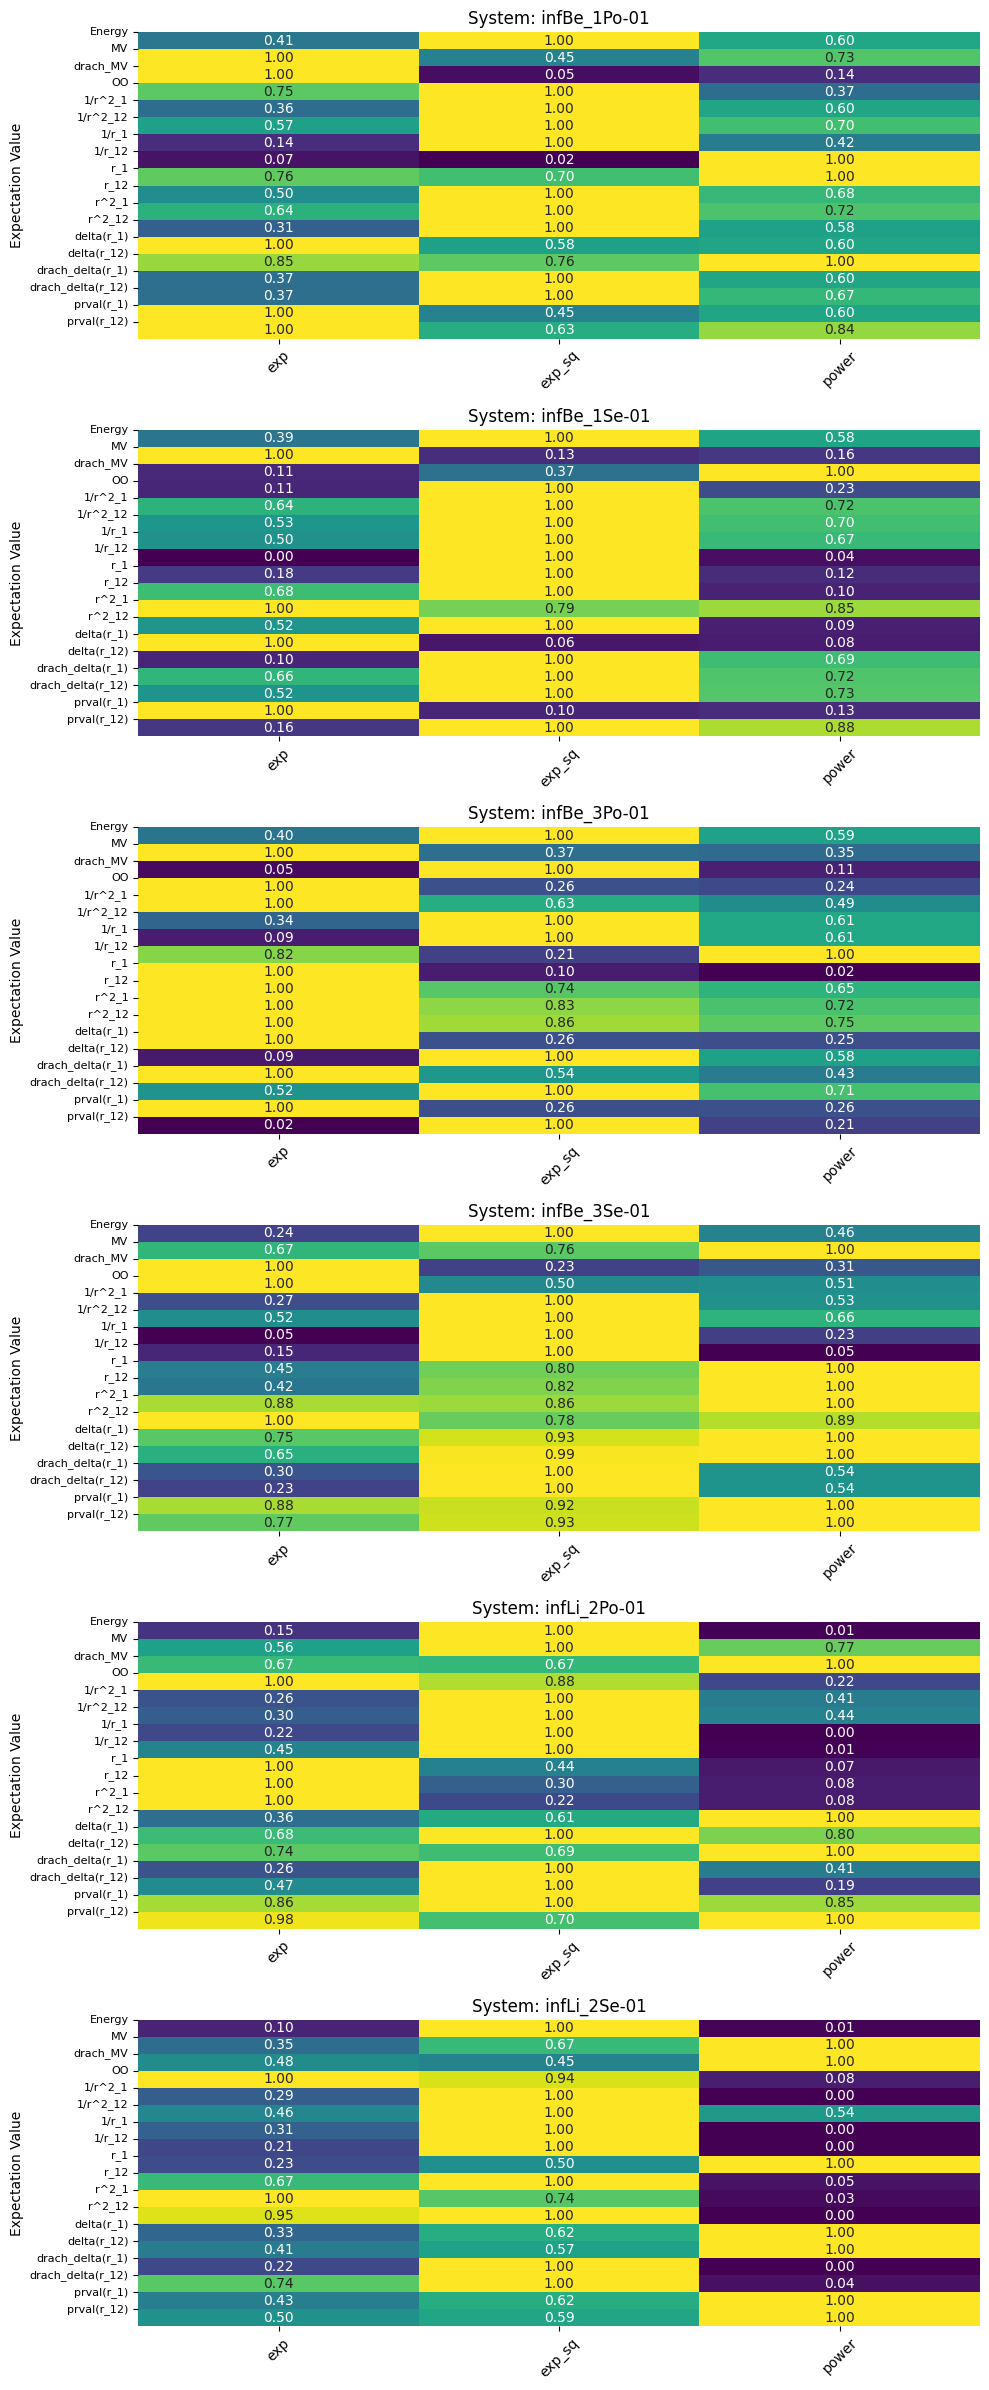

In [117]:
import seaborn as sns
import matplotlib.pyplot as plt

# Melt to long format
df_long = df_ranked.melt(
    id_vars=["system","expectation_value"],
    value_vars=["rank_exp","rank_exp_sq","rank_power"],
    var_name="method", value_name="rank"
)

# Clean method names
df_long["method"] = df_long["method"].str.replace("rank_", "")

# Full list of expectation values
all_expectations = [
    'Energy', 'MV', 'drach_MV', 'OO', '1/r^2_1', '1/r^2_12', '1/r_1',
    '1/r_12', 'r_1', 'r_12', 'r^2_1', 'r^2_12', 'delta(r_1)', 'delta(r_12)',
    'drach_delta(r_1)', 'drach_delta(r_12)', 'prval(r_1)', 'prval(r_12)'
]

# Plot one heatmap per system
systems = df_ranked["system"].unique()
n_systems = len(systems)

fig, axes = plt.subplots(
    n_systems, 1, figsize=(10, max(4*n_systems, 0.4*len(all_expectations)))
)

# Make axes iterable even if n_systems=1
if n_systems == 1:
    axes = [axes]

for ax, system in zip(axes, systems):
    pivot = df_long[df_long["system"]==system].pivot(
        index="expectation_value", columns="method", values="rank"
    )
    pivot = pivot.reindex(all_expectations)  # ensure all rows

    sns.heatmap(
        pivot, cmap="viridis", annot=True, fmt=".2f", cbar=False, ax=ax
    )
    ax.set_title(f"System: {system}")
    ax.set_ylabel("Expectation Value")
    ax.set_xlabel("")

    # Force all labels to show
    ax.set_yticks(range(len(all_expectations)))
    ax.set_yticklabels(all_expectations, fontsize=8)

    ax.tick_params(axis="x", rotation=45)

plt.tight_layout()
plt.show()
